In [2]:
###KNN
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

In [4]:
ctg=pd.read_csv(r'C:\Users\ideal\OneDrive\Desktop\machine learnig\CTG.csv')
ctg

,LB,AC,FM,NSP
0,120,0.000,0.000,2
1,132,0.006,0.000,1
2,133,0.003,0.000,1
3,134,0.003,0.000,1
4,132,0.007,0.000,1
...,...,...,...,...
2121,140,0.000,0.000,2
2122,140,0.001,0.000,2
2123,140,0.001,0.000,2
2124,140,0.001,0.000,2


In [5]:
ctg.isnull().sum()[ctg.isnull().sum()>0]

Series([], dtype: int64)

In [6]:
from sklearn.model_selection import train_test_split
ctg_train,ctg_test=train_test_split(ctg,test_size=.2)

In [7]:
ctg.NSP.value_counts()

NSP
1    1655
2     295
3     176
Name: count, dtype: int64

In [8]:
df2=ctg_train[ctg_train.NSP==2]
df3=ctg_train[ctg_train.NSP==3]
ctg_train=pd.concat([ctg_train,df3,df3,df3,df3,df2])

In [9]:
ctg_train_x=ctg_train.iloc[:,0:-1]
ctg_train_y=ctg_train.iloc[:,-1]

ctg_test_x=ctg_test.iloc[:,0:-1]
ctg_test_y=ctg_test.iloc[:,-1]


In [10]:
ctg_test_y

1483    1
188     2
234     1
157     1
297     3
       ..
597     3
794     1
883     1
715     1
557     1
Name: NSP, Length: 426, dtype: int64

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=37)


In [12]:
knn.fit(ctg_train_x,ctg_train_y)

KNeighborsClassifier(n_neighbors=37)

In [13]:
pred_knn=knn.predict(ctg_test_x)

In [14]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [15]:
tab_knn=confusion_matrix(ctg_test_y,pred_knn)

In [16]:
tab_knn

array([[255,  27,  44],
       [ 26,  26,   9],
       [ 10,  10,  19]])

In [17]:
accuracy_score(ctg_test_y,pred_knn)

0.704225352112676

In [18]:
print(classification_report(ctg_test_y,pred_knn))

              precision    recall  f1-score   support

           1       0.88      0.78      0.83       326
           2       0.41      0.43      0.42        61
           3       0.26      0.49      0.34        39

    accuracy                           0.70       426
   macro avg       0.52      0.57      0.53       426
weighted avg       0.75      0.70      0.72       426



In [19]:
l1=[]
for k in range(1,100):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(ctg_train_x,ctg_train_y)
    pred_knn=knn.predict(ctg_test_x)
    tab_knn=confusion_matrix(ctg_test_y,pred_knn)
    acc=accuracy_score(ctg_test_y,pred_knn)
    l1.append(acc)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

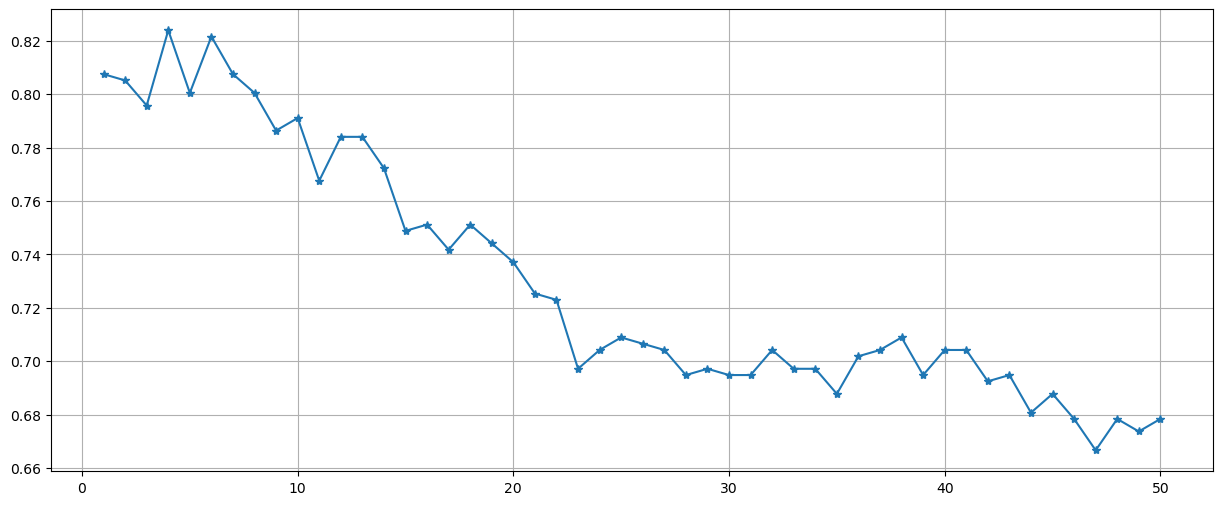

In [21]:
plt.figure(figsize=(15,6))
plt.plot(list(range(1,51)),l1[:50], marker='*')
plt.grid()

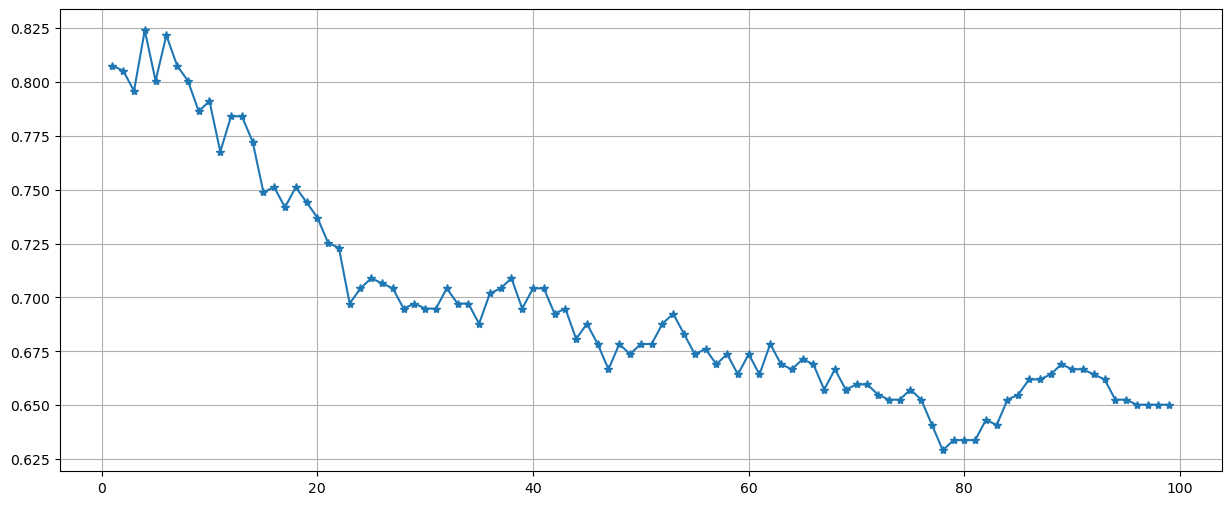

In [22]:
plt.figure(figsize=(15,6))
plt.plot(list(range(1,100)),l1,marker='*')
plt.grid()